![](shopping-trends-image.jpeg)

In [2]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
shop = pd.read_csv('shopping_trends_updated.csv')

In [5]:
shop.shape

(3900, 18)

In [6]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [9]:
shop.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [10]:
print(f"The unique values of the 'Gender' column are: {shop['Gender'].unique()}")
print(f"The unique values of the 'Category' column are: {shop['Category'].unique()}")
print(f"The unique values of the 'Size' column are: {shop['Size'].unique()}")
print(f"The unique values of the 'Subscription Status' column are: {shop['Subscription Status'].unique()}")
print(f"The unique values of the 'Shipping Type' column are: {shop['Shipping Type'].unique()}")
print(f"The unique values of the 'Discount Applied' column are: {shop['Discount Applied'].unique()}")
print(f"The unique values of the 'Promo Code Used' column are: {shop['Promo Code Used'].unique()}")
print(f"The unique values of the 'Payment Method' column are: {shop['Payment Method'].unique()}")

The unique values of the 'Gender' column are: ['Male' 'Female']
The unique values of the 'Category' column are: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
The unique values of the 'Size' column are: ['L' 'S' 'M' 'XL']
The unique values of the 'Subscription Status' column are: ['Yes' 'No']
The unique values of the 'Shipping Type' column are: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']
The unique values of the 'Discount Applied' column are: ['Yes' 'No']
The unique values of the 'Promo Code Used' column are: ['Yes' 'No']
The unique values of the 'Payment Method' column are: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


# **Observation**

## **Dataset Overview**
Upon initial examination of the dataset, we find a well-structured and comprehensive dataset comprising:  
- **Rows**: 3900  
- **Columns**: 18  

The dataset is complete, with **no missing values**, allowing for confident analysis.

---

## **Column Descriptions and Their Significance**

### **Customer Demographics**
- **Customer ID**: Unique identifier for each customer, enabling differentiation.  
- **Age**: Offers insights into customer age demographics, preferences, and behaviors.  
- **Gender**: Helps analyze buying patterns based on gender distinctions.  

### **Purchase Details**
- **Item Purchased**: Specific products bought by customers, aiding in understanding popular choices.  
- **Category**: Groups products into categories (e.g., clothing, footwear), facilitating trend analysis.  
- **Purchase Amount (USD)**: Displays spending habits, helping assess purchase value distributions.  

### **Geographical and Temporal Insights**
- **Location**: Indicates customer geography, aiding in the analysis of regional trends.  
- **Season**: Captures the season during purchases, helping explore seasonal shopping trends.  

### **Product Characteristics**
- **Size**: Reveals size preferences across various categories.  
- **Color**: Helps understand color preferences and their impact on purchases.  

### **Customer Feedback**
- **Review Rating**: Displays product satisfaction and quality through customer ratings.  

### **Promotions and Discounts**
- **Discount Applied**: Indicates if discounts were used, analyzing their impact on behavior.  
- **Promo Code Used**: Tracks promotional campaign effectiveness.  

### **Loyalty and Engagement**
- **Previous Purchases**: Counts prior purchases to gauge loyalty and repeat business.  
- **Subscription Status**: Indicates engagement through subscription choices.  

### **Logistics and Payment**
- **Shipping Type**: Shows preferred shipping methods among customers.  
- **Payment Method**: Highlights various payment methods used during purchases.  

### **Buying Patterns**
- **Frequency of Purchases**: Tracks customer buying habits and identifies purchasing patterns.  

---

## **Conclusion**
This dataset provides a rich and diverse set of attributes to explore customer shopping trends. It enables us to:  
- Uncover customer preferences.  
- Analyze buying behaviors.  
- Drive data-driven decisions to enhance the customer experience.

Let’s dive into the analysis and uncover valuable insights!


### 1 What is the overall distribution of customer ages in the dataset?

In [4]:
shop['Age'].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
54    83
27    83
50    83
62    83
32    82
58    81
19    81
42    80
31    79
28    79
43    79
37    77
29    76
46    76
63    75
59    75
68    75
56    74
36    74
52    73
64    73
55    73
51    72
65    72
45    72
40    72
35    72
47    71
66    71
30    71
23    71
53    70
38    70
18    69
26    69
21    69
34    68
39    68
48    68
24    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

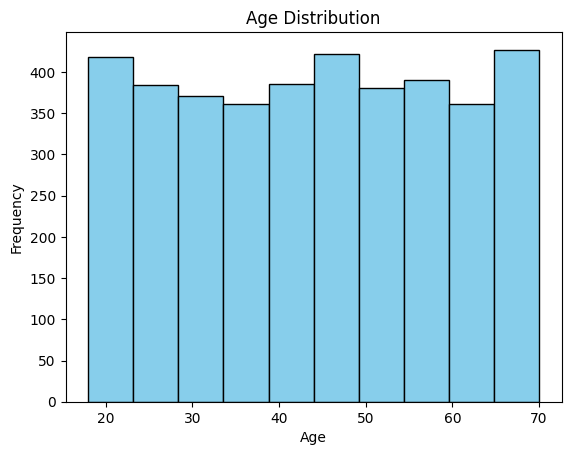

In [5]:
plt.hist(shop['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 2 How does the average purchase amount vary across different product categories?

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


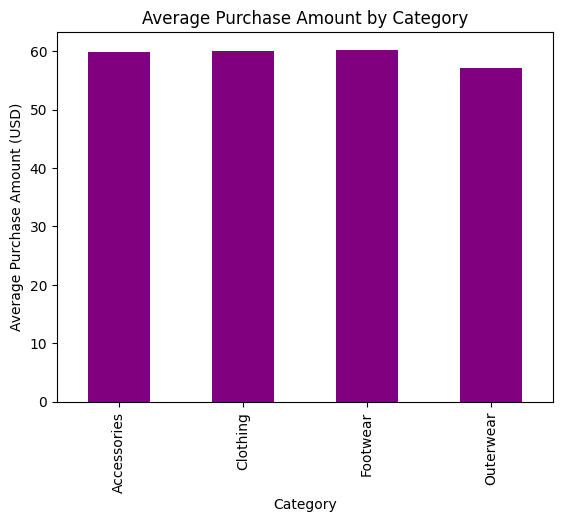

In [6]:
# Group by category and calculate the average purchase amount
average_purchase = shop.groupby('Category')['Purchase Amount (USD)'].mean()
print(average_purchase)

# Bar plot
average_purchase.plot(kind='bar', color='purple')
plt.title('Average Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


### 3 Which gender has the highest number of purchases?

Gender
Male      2652
Female    1248
Name: count, dtype: int64


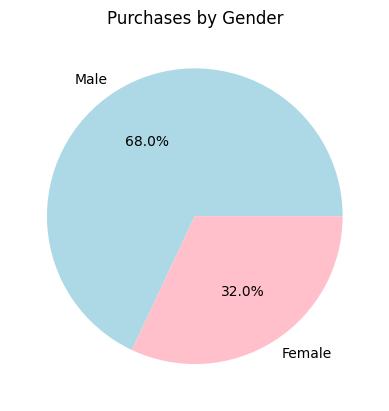

In [7]:
# Count purchases by gender
gender_counts = shop['Gender'].value_counts()
print(gender_counts)

# Pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Purchases by Gender')
plt.ylabel('')
plt.show()


### 4 What are the most commonly purchased items in each category?

In [8]:
# Find the top purchased items per category
most_purchased_items = shop.groupby('Category')['Item Purchased'].value_counts().groupby(level=0).head(3)
print(most_purchased_items)

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
Clothing     Blouse            171
             Pants             171
             Shirt             169
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64


### 5 Are there any specific seasons or months where customer spending is significantly higher?

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64


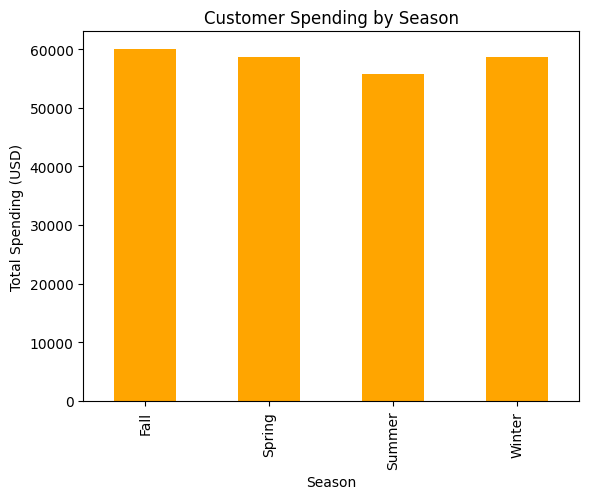

In [9]:
# Group by season and calculate the total purchase amount
season_spending = shop.groupby('Season')['Purchase Amount (USD)'].sum()
print(season_spending)

# Bar plot
season_spending.plot(kind='bar', color='orange')
plt.title('Customer Spending by Season')
plt.xlabel('Season')
plt.ylabel('Total Spending (USD)')
plt.show()


### 6 What is the average rating given by customers for each product category?

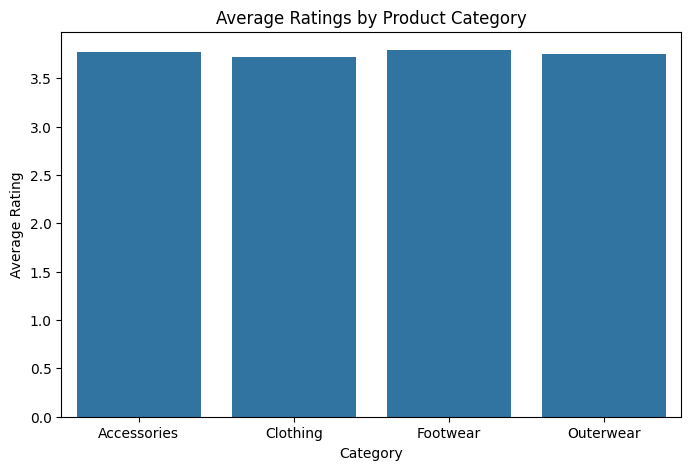

In [34]:
# Assuming there's a 'Rating' column
category_rating_avg = shop.groupby('Category')['Review Rating'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_rating_avg.index, y=category_rating_avg.values)
plt.title('Average Ratings by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()


### 7 Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64


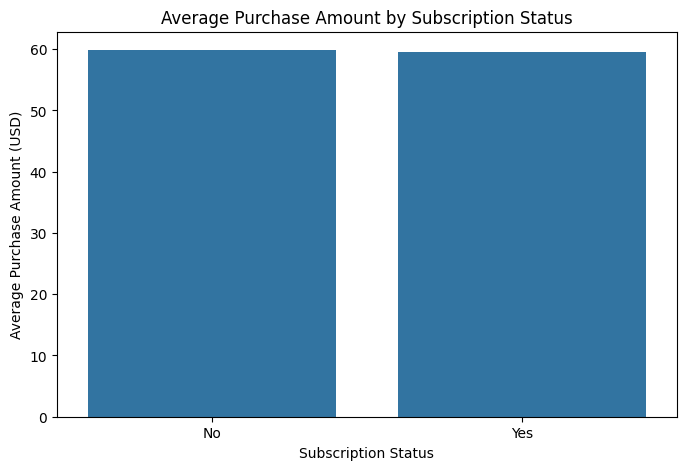

In [28]:
subscription_behavior = shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
print(subscription_behavior)

plt.figure(figsize=(8, 5))
sns.barplot(x=subscription_behavior.index, y=subscription_behavior.values)
plt.title('Average Purchase Amount by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

### 8 Which payment method is the most popular among customers?

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


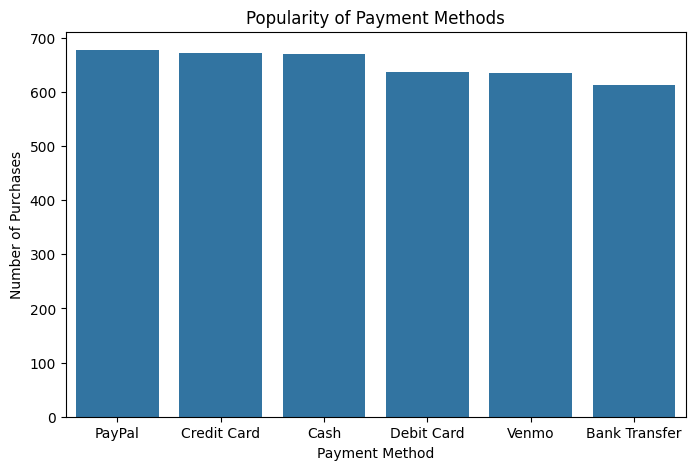

In [11]:
# Count purchases by payment method
payment_counts = shop['Payment Method'].value_counts()
print(payment_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Popularity of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Purchases')
plt.show()

### 9 Do customers who use promo codes tend to spend more than those who don't?

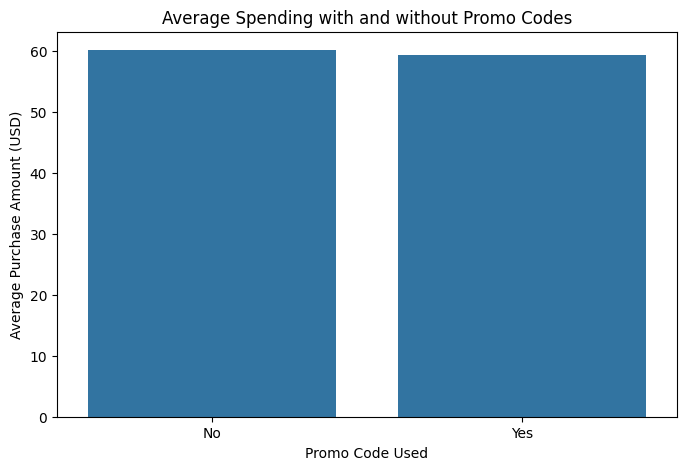

In [23]:
promo_spending = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=promo_spending.index, y=promo_spending.values)
plt.title('Average Spending with and without Promo Codes')
plt.xlabel('Promo Code Used')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


### 10 How does the frequency of purchases vary across different age groups?

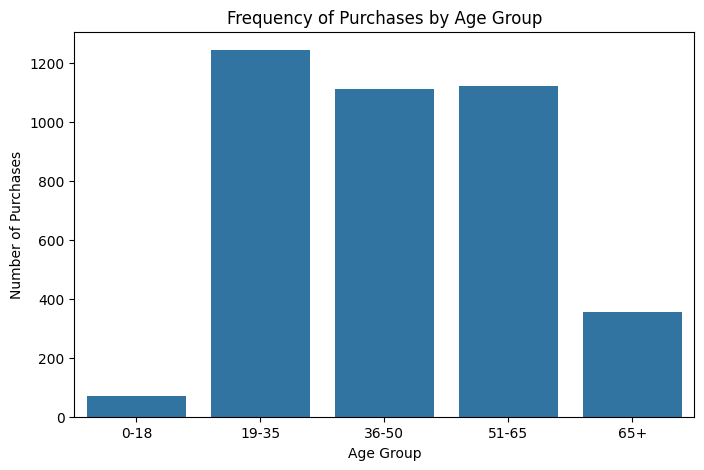

In [20]:
shop['Age Group'] = pd.cut(shop['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])
age_group_counts = shop['Age Group'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Frequency of Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.show()


### 11 Are there any correlations between the size of the product and the purchase amount?

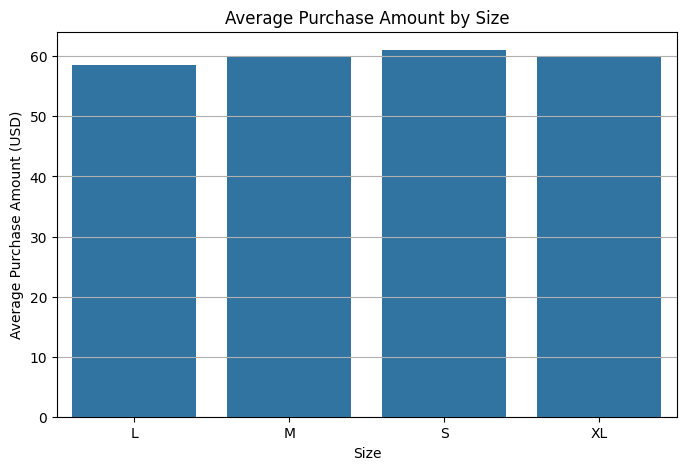

In [46]:
# Grouping data by 'Size' and calculating the average purchase amount
size_purchase_avg = shop.groupby('Size')['Purchase Amount (USD)'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=size_purchase_avg.index, y=size_purchase_avg.values)
plt.title('Average Purchase Amount by Size')
plt.xlabel('Size')
plt.ylabel('Average Purchase Amount (USD)')
plt.grid(axis='y')
plt.show()


### 12 Which shipping type is preferred by customers for different product categories?

In [17]:
shipping_preference = shop.groupby('Category')['Shipping Type'].value_counts()
print(shipping_preference)


Category     Shipping Type 
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64


### 13 How does the presence of a discount affect the purchase decision of customers?

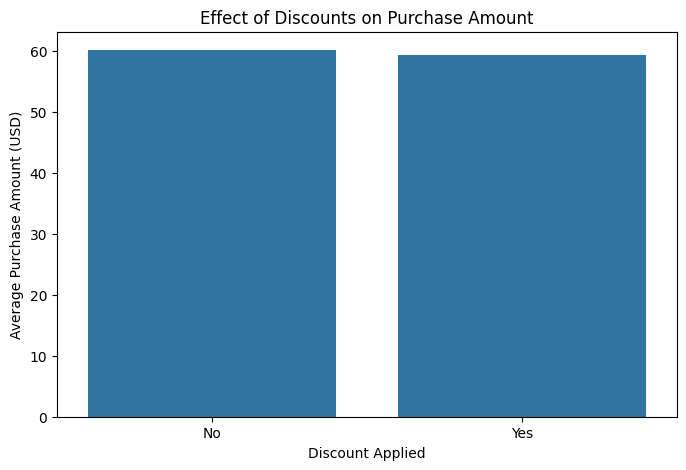

In [16]:
discount_effect = shop.groupby('Discount Applied')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=discount_effect.index, y=discount_effect.values)
plt.title('Effect of Discounts on Purchase Amount')
plt.xlabel('Discount Applied')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


### 14 Are there any specific colors that are more popular among customers?

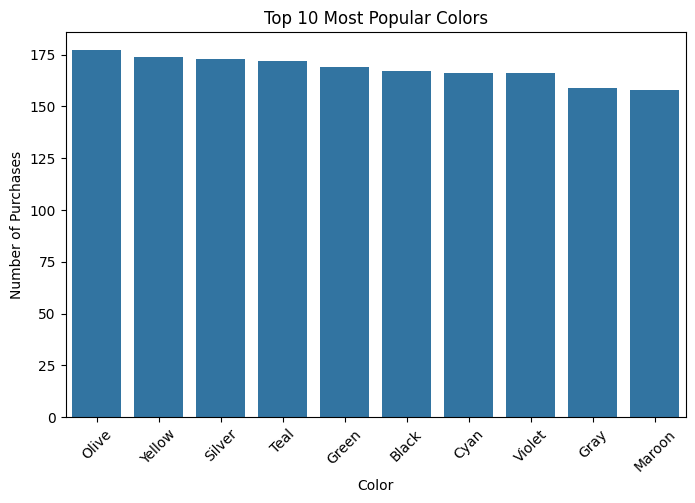

In [14]:
color_popularity = shop['Color'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=color_popularity.index, y=color_popularity.values)
plt.title('Top 10 Most Popular Colors')
plt.xlabel('Color')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


### 15 What is the average number of previous purchases made by customers?

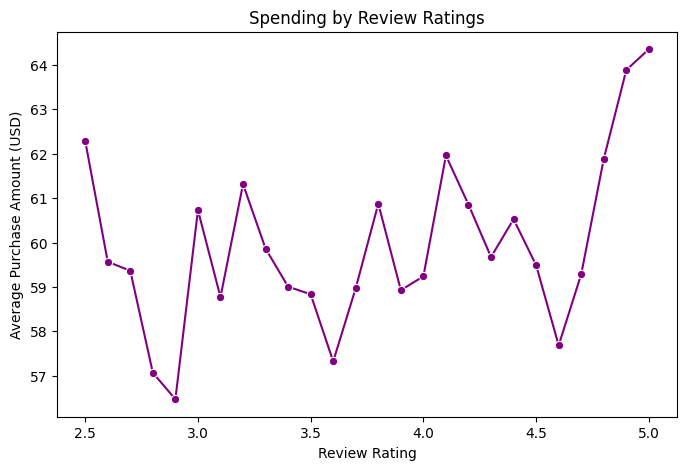

In [12]:
spending_by_rating = shop.groupby('Review Rating')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=spending_by_rating.index, y=spending_by_rating.values, marker='o', color='purple')
plt.title('Spending by Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


### 16 Are there any noticeable differences in purchase behavior between different locations?

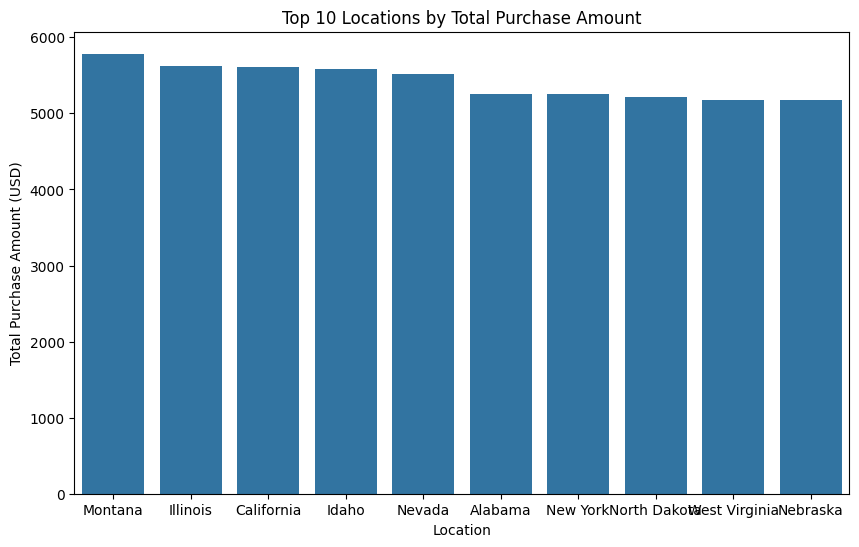

In [14]:
# Grouping data by 'Location' and calculating the total purchase amount
location_spending = shop.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=location_spending.index, y=location_spending.values)
plt.title('Top 10 Locations by Total Purchase Amount')
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()


### 17 Is there a relationship between customer age and the category of products they purchase?

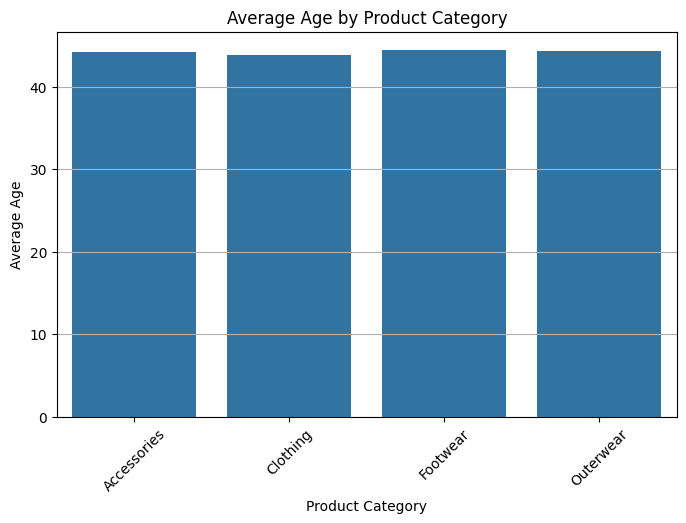

In [23]:
# Grouping data by 'Category' and calculating the average age
category_age_avg = shop.groupby('Category')['Age'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=category_age_avg.index, y=category_age_avg.values)
plt.title('Average Age by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### 18 How does the average purchase amount differ between male and female customers?

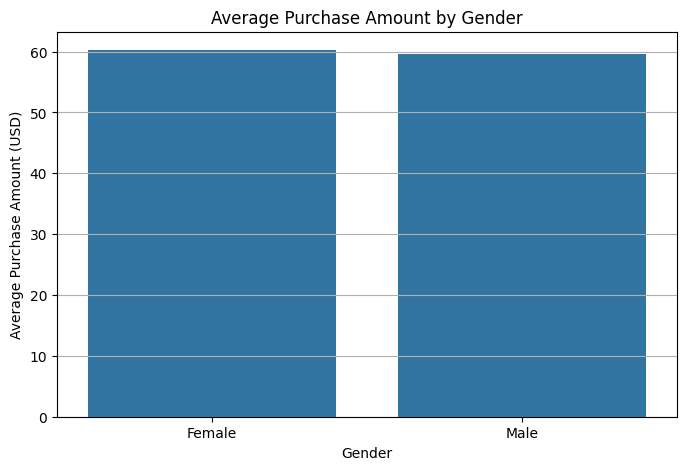

In [16]:
# Grouping data by 'Gender' and calculating the average purchase amount
gender_purchase_avg = shop.groupby('Gender')['Purchase Amount (USD)'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_purchase_avg.index, y=gender_purchase_avg.values)
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.grid(axis='y')
plt.show()
